#Import libraries

In [ ]:
!pip install pyfim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfim: filename=pyfim-6.28-cp310-cp310-linux_x86_64.whl size=637335 sha256=f84e49fb9d69131787d6d8c4e5cf7c3de0655c7f35c69def4b609bafd56cfc87
  Stored in directory: /root/.cache/pip/wheels/96/0a/b3/c877bfa85c4cfe1baf3de4a89e1949382be09de5eabe49314f
Successfully built pyfim


In [ ]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from graphviz import *

pd.set_option('display.max_colwidth', None)

#Load Dataset

In [ ]:
df_siembra = pd.read_excel("https://www.datosabiertos.gob.pe/node/6920/download")
df_siembra

DEPARTAMENTO         PROVINICA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  
0        0    0    1    0    0    0    0    0    0    0    0    0  
1        0    0    1    0    0    0    0    0    0    0    0    0  
2        0    0    1    0    0    0    0    0    0    0    0    0  
3        0    0    1    0    0    0    0    0    0    0    0    0  
4        0    0    1    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
12176    0    0    0    0    0    4    5    0    0    0    0    0  
12177    0    0    0    0    0    3    4    0    0    0    0    0  
12178    0    0    0    0    0    3    5    0    0    0    0    0  
12179    0    0    0    0    0    3    2    0    0    0    0    0  
12180    0    0    0    0    0    3    3    0    0    0    0    0  

[12181 rows x 17 columns]

In [ ]:
df_siembra.shape

(12181, 17)

##Renaming columns

In [ ]:
df_siembra.rename(columns={'PROVINICA':'PROVINCIA'}, inplace=True)
df_siembra

DEPARTAMENTO         PROVINCIA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  
0        0    0    1    0    0    0    0    0    0    0    0    0  
1        0    0    1    0    0    0    0    0    0    0    0    0  
2        0    0    1    0    0    0    0    0    0    0    0    0  
3        0    0    1    0    0    0    0    0    0    0    0    0  
4        0    0    1    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
12176    0    0    0    0    0    4    5    0    0    0    0    0  
12177    0    0    0    0    0    3    4    0    0    0    0    0  
12178    0    0    0    0    0    3    5    0    0    0    0    0  
12179    0    0    0    0    0    3    2    0    0    0    0    0  
12180    0    0    0    0    0    3    3    0    0    0    0    0  

[12181 rows x 17 columns]

##Count how many unique values for a column

In [ ]:
print('Hay {} cultivos'.format(len(df_siembra['CULTIVO'].unique())))
print(df_siembra['CULTIVO'].unique())

Hay 26 cultivos
['Papa nativa' 'Olluco' 'Quinua' 'Papa color' 'Frijol grano seco'
 'Arveja grano seco' 'Arveja grano verde' 'Zapallo' 'Cebada grano'
 'Tomate' 'Papa blanca' 'Maiz amarillo duro' 'Cebolla cabeza roja' 'Aji'
 'Trigo' 'Haba grano seco' 'Yuca' 'Zanahoria' 'Maiz choclo'
 'Maiz amilaceo' 'Ajo' 'Camote' 'Arroz cascara' 'Algodon' 'Paprika'
 'Cebolla cabeza blanca o amarilla']


##Create a copy of the dataframe for change columns

In [ ]:
df_siembra['UBICACION'] = df_siembra['DEPARTAMENTO'] + '-' + df_siembra['PROVINCIA'] + '-' + df_siembra['DISTRITO']
print('Hay {} distritos'.format(len(df_siembra['UBICACION'].unique())))
df_siembra

Hay 1503 distritos


DEPARTAMENTO         PROVINCIA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  \
0        0    0    1    0    0    0    0    0    0    0    0    0   
1        0    0    1    0    0    0    0    0    0    0    0    0   
2        0    0    1    0    0    0    0    0    0    0    0    0   
3        0    0    1    0    0    0    0    0    0    0    0    0   
4        0    0    1    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12176    0    0    0    0    0    4    5    0    0    0    0    0   
12177    0    0    0    0    0    3    4    0    0    0    0    0   
12178    0    0    0    0    0    3    5    0    0    0    0    0   
12179    0    0    0    0    0    3    2    0    0    0    0    0   
12180    0    0    0    0    0    3    3    0    0    0    0    0   

                               UBICACION  
0                     ANCASH-AIJA-SUCCHA  
1      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
2      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
3           ANCASH-ANTONIO RAYMONDI-ACZO  
4        ANCASH-ANTONIO RAYMONDI-CHINGAS  
...                                  ...  
12176            ANCASH-RECUAY-TAPACOCHA  
12177            ANCASH-RECUAY-TAPACOCHA  
12178            ANCASH-RECUAY-TAPACOCHA  
12179                ANCASH-SANTA-MACATE  
12180             ANCASH-YUNGAY-MATACOTO  

[12181 rows x 18 columns]

In [ ]:
df_siembra.describe()

AGO           SEP           OCT           NOV           DIC  \
count  12181.000000  12181.000000  12181.000000  12181.000000  12181.000000   
mean      11.327970     18.239061     25.052295     17.799606     12.641162   
std       77.845864     81.309937     94.292596     69.350405     68.802992   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      2.000000      0.000000      0.000000   
75%        1.000000      6.000000     12.000000      9.000000      4.000000   
max     4240.000000   2880.000000   3795.000000   2335.000000   2430.000000   

                ENE           FEB           MAR           ABR           MAY  \
count  12181.000000  12181.000000  12181.000000  12181.000000  12181.000000   
mean      14.829981     13.537312      9.256711      7.304573      6.241113   
std      107.289746    107.667408     64.827234     51.758978     40.645111   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      0.000000      0.000000      0.000000      0.000000   
max     5265.000000   4250.000000   2200.000000   2650.000000   1815.000000   

                JUN           JUL  
count  12181.000000  12181.000000  
mean       7.023808      5.863394  
std       44.149594     42.026320  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     2241.000000   2391.000000

#Transform into transactionnal dataset

In [ ]:
def to_transactionnal(df, column_trans, column_items):
  transactions = []
  for v in df[column_trans].unique():
    transactions.append(list(df[df[column_trans] == v][column_items].values))
  return transactions

trans = to_transactionnal(df_siembra, 'UBICACION', 'CULTIVO')
print(len(trans))

1503


In [ ]:
print(df_siembra['UBICACION'].unique()[0], trans[0]) #la lista de cultivos declarados por el distrito 0
print(df_siembra['UBICACION'].unique()[20], trans[20]) #la lista de cultivos declarados por el distrito 20
print(df_siembra['UBICACION'].unique()[50], trans[50]) #la lista de cultivos declarados por el distrito 50
print(df_siembra['UBICACION'].unique()[120], trans[120]) #la lista de cultivos declarados por el distrito 120
print(df_siembra['UBICACION'].unique()[500], trans[500]) #la lista de cultivos declarados por el distrito 500
print(df_siembra['UBICACION'].unique()[800], trans[800]) #la lista de cultivos declarados por el distrito 800
print(df_siembra['UBICACION'].unique()[1000], trans[1000]) #la lista de cultivos declarados por el distrito 1000
print(df_siembra['UBICACION'].unique()[1500], trans[1500]) #la lista de cultivos declarados por el distrito 1500

ANCASH-AIJA-SUCCHA ['Papa nativa', 'Olluco', 'Quinua', 'Papa color', 'Papa blanca', 'Frijol grano seco', 'Maiz amilaceo', 'Trigo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco']
HUANCAVELICA-HUANCAVELICA-MARISCAL CACERES ['Papa blanca', 'Cebada grano', 'Haba grano seco', 'Maiz amilaceo', 'Arveja grano seco', 'Arveja grano verde', 'Quinua', 'Trigo', 'Maiz choclo']
ANCASH-ANTONIO RAYMONDI-SAN JUAN DE RONTOY ['Arveja grano verde', 'Olluco', 'Quinua', 'Arveja grano seco', 'Haba grano seco', 'Papa blanca', 'Maiz amilaceo', 'Papa nativa', 'Papa color', 'Cebada grano', 'Trigo']
CUSCO-CANCHIS-CHECACUPE ['Arveja grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Trigo', 'Maiz amilaceo', 'Quinua', 'Cebolla cabeza roja', 'Maiz choclo', 'Papa nativa', 'Cebada grano']
PUNO-MOHO-MOHO ['Papa nativa', 'Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Quinua', 'Trigo', 'Olluco']
LIMA-HUAURA-HUAURA ['Paprika', 'Yuca', 'Algodon', 'Arveja grano

#Mining closed itemsets with 10% for min_freq and 2 for min_size

In [ ]:
r = fpgrowth(trans, target='c', supp=10, zmin=2)
df = pd.DataFrame(r)
df.columns = ['Itemset', 'Freq']
df.sort_values(by='Freq', ascending=False)

Itemset  \
2407                                                                                    (Papa blanca, Maiz amilaceo)   
2403                                                                                           (Trigo, Cebada grano)   
2408                                                                                   (Cebada grano, Maiz amilaceo)   
2404                                                                                          (Trigo, Maiz amilaceo)   
2396                                                                                 (Haba grano seco, Cebada grano)   
...                                                                                                              ...   
57                                                     (Quinua, Maiz choclo, Papa color, Papa blanca, Maiz amilaceo)   
721                             (Maiz amarillo duro, Frijol grano seco, Haba grano seco, Papa blanca, Maiz amilaceo)   
725                         (Maiz amarillo duro, Frijol grano seco, Trigo, Papa blanca, Cebada grano, Maiz amilaceo)   
929   (Maiz choclo, Papa nativa, Arveja grano seco, Papa color, Haba grano seco, Trigo, Cebada grano, Maiz amilaceo)   
2005     (Arveja grano seco, Frijol grano seco, Papa color, Olluco, Trigo, Papa blanca, Cebada grano, Maiz amilaceo)   

      Freq  
2407   702  
2403   702  
2408   701  
2404   698  
2396   661  
...    ...  
57     151  
721    151  
725    151  
929    151  
2005   151  

[2409 rows x 2 columns]

##Extract the support for each itemset

In [ ]:
#función para obtener el support de un itemset x
def support(x, labels, trans):
  s = [] #inicializar el support como vacío
  for t in range(len(trans)): #para cada transacción
    if set(x).issubset(set(trans[t])):
      s.append(labels[t])
  return s

#recuperar los nombres de los distritos como labels
labels = df_siembra['UBICACION'].unique()
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df['Support'] = [support(x, labels, trans) for x in df['Itemset'].values]
df

Itemset  Freq  \
0     (Arroz cascara, Yuca, Maiz amarillo duro, Frijol grano seco)   235   
1                        (Arroz cascara, Yuca, Maiz amarillo duro)   262   
2                         (Arroz cascara, Yuca, Frijol grano seco)   237   
3                                            (Arroz cascara, Yuca)   267   
4           (Arroz cascara, Maiz amarillo duro, Frijol grano seco)   245   
...                                                            ...   ...   
2404                                        (Trigo, Maiz amilaceo)   698   
2405                    (Papa blanca, Cebada grano, Maiz amilaceo)   597   
2406                                   (Papa blanca, Cebada grano)   624   
2407                                  (Papa blanca, Maiz amilaceo)   702   
2408                                 (Cebada grano, Maiz amilaceo)   701   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Support  
0                                   [CAJAMARCA-CUTERVO-QUEROCOTILLO, CAJAMARCA-CONTUMAZA-CONTUMAZA, AMAZONAS-UTCUBAMBA-CUMBA, CAJAMARCA-CAJAMAR

##Function for mining itemsets with a given threshold

In [ ]:
def all_itemsets(trans_, supp_):
  #calcular todos los itemsets frecuentes
  #con soporte mínimi supp_
  #reportando su frecuencia absoluta 'a' y relativa 'S'
  r = fpgrowth(trans_, supp=supp_, report='aS')
  df_items = pd.DataFrame(r) #transformar r en dataframe
  df_items.columns = ['Itemset', 'Freq', 'Freq(%)'] #cambiar encabezados de las columnas
  df_items.sort_values(by='Freq', ascending=False, inplace=True) #ordenar df por frecuencia descendentemente
  df_items['Itemset'] = [str(sorted(x)) for x in df_items['Itemset'].values]
  return df_items

#extraer todos los itemsets frecuentes que aparezcan al menos 1 vez
all_itemsets(trans, -1)

Itemset  \
0                                                                                                                                                                                      ['Maiz amilaceo']   
2                                                                                                                                                                                       ['Cebada grano']   
6                                                                                                                                                                                        ['Papa blanca']   
14                                                                                                                                                                                             ['Trigo']   
254                                                                                                                                                                                ['Frijol grano seco']   
...                                                                                                                                                                                                  ...   
2465601                               ['Ajo', 'Arroz cascara', 'Arveja grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Tomate', 'Trigo', 'Yuca', 'Zapallo']   
2465602                                                    ['Ajo', 'Arroz cascara', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Tomate', 'Trigo', 'Yuca', 'Zapallo']   
2465603                           ['Ajo', 'Arroz cascara', 'Arveja grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Papa color', 'Papa nativa', 'Tomate', 'Trigo', 'Yuca', 'Zapallo']   
2465604                                                ['Ajo', 'Arroz cascara', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Papa color', 'Papa nativa', 'Tomate', 'Trigo', 'Yuca', 'Zapallo']   
2053963  ['Ajo', 'Cebada grano', 'Cebolla cabeza roja', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Papa color', 'Quinua', 'Tomate', 'Trigo', 'Yuca']   

         Freq    Freq(%)  
0         926  61.610113  
2         802  53.359947  
6         773  51.430472  
14        756  50.299401  
254       748  49.767132  
...       ...        ...  
2465601     1   0.066534  
2465602     1   0.066534  
2465603     1   0.066534  
2465604     1   0.066534  
2053963     1   0.066534  

[4107926 rows x 3 columns]

#Mining emerging patterns
We are going to compare Cusco vs the rest of the country

##Dataset for Cusco

In [ ]:
df_siembra_cusco = df_siembra[df_siembra['DEPARTAMENTO'] == 'CUSCO']
trans_cusco = to_transactionnal(df_siembra_cusco, 'UBICACION', 'CULTIVO') #convertir en transaccional el df de Cusco
print(len(trans_cusco))
df_siembra_cusco

53


DEPARTAMENTO    PROVINCIA    DISTRITO              CULTIVO    CAMPANA  \
96           CUSCO         ANTA   CACHIMAYO    Arveja grano seco  2020-2021   
97           CUSCO      CANCHIS   SAN PEDRO               Quinua  2020-2021   
201          CUSCO         ANTA  HUAROCONDO          Papa blanca  2020-2021   
202          CUSCO         ANTA      ZURITE          Papa blanca  2020-2021   
203          CUSCO        CANAS     YANAOCA               Olluco  2020-2021   
...            ...          ...         ...                  ...        ...   
11299        CUSCO         ANTA   ANCAHUASI  Cebolla cabeza roja  2020-2021   
11745        CUSCO         ANTA   CACHIMAYO            Zanahoria  2020-2021   
11896        CUSCO  PAUCARTAMBO      CAICAY  Cebolla cabeza roja  2020-2021   
11897        CUSCO  PAUCARTAMBO  COLQUEPATA            Zanahoria  2020-2021   
11898        CUSCO  PAUCARTAMBO  HUANCARANI  Cebolla cabeza roja  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  \
96       0    0    2    0    0    0    0    0    0    0    0    0   
97       0    0    2    0    0    0    0    0    0    0    0    0   
201      0    0   13    0    0    0    0    0    0    0    0    0   
202      0    0   10    0    0    0    0    0    0    0    0    0   
203      0    0    8    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11299    0    0    0    0    7    0    1    0    0    0    0    0   
11745    0    0    0    0    0    0    2    1    0    0    0    0   
11896    0    0    0    0    0    1    1    0    0    0    0    0   
11897    0    0    0    0    0    2    2    0    0    0    0    0   
11898    0    0    0    0    0    2    3    0    0    0    0    0   

                          UBICACION  
96             CUSCO-ANTA-CACHIMAYO  
97          CUSCO-CANCHIS-SAN PEDRO  
201           CUSCO-ANTA-HUAROCONDO  
202               CUSCO-ANTA-ZURITE  
203             CUSCO-CANAS-YANAOCA  
...                             ...  
11299          CUSCO-ANTA-ANCAHUASI  
11745          CUSCO-ANTA-CACHIMAYO  
11896      CUSCO-PAUCARTAMBO-CAICAY  
11897  CUSCO-PAUCARTAMBO-COLQUEPATA  
11898  CUSCO-PAUCARTAMBO-HUANCARANI  

[495 rows x 18 columns]

##Dataset for the rest

In [ ]:
df_siembra_not_cusco = df_siembra[df_siembra['DEPARTAMENTO'] != 'CUSCO']
trans_not_cusco = to_transactionnal(df_siembra_not_cusco, 'UBICACION', 'CULTIVO')
print(len(trans_not_cusco))
df_siembra_not_cusco

1450


DEPARTAMENTO         PROVINCIA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  \
0        0    0    1    0    0    0    0    0    0    0    0    0   
1        0    0    1    0    0    0    0    0    0    0    0    0   
2        0    0    1    0    0    0    0    0    0    0    0    0   
3        0    0    1    0    0    0    0    0    0    0    0    0   
4        0    0    1    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12176    0    0    0    0    0    4    5    0    0    0    0    0   
12177    0    0    0    0    0    3    4    0    0    0    0    0   
12178    0    0    0    0    0    3    5    0    0    0    0    0   
12179    0    0    0    0    0    3    2    0    0    0    0    0   
12180    0    0    0    0    0    3    3    0    0    0    0    0   

                               UBICACION  
0                     ANCASH-AIJA-SUCCHA  
1      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
2      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
3           ANCASH-ANTONIO RAYMONDI-ACZO  
4        ANCASH-ANTONIO RAYMONDI-CHINGAS  
...                                  ...  
12176            ANCASH-RECUAY-TAPACOCHA  
12177            ANCASH-RECUAY-TAPACOCHA  
12178            ANCASH-RECUAY-TAPACOCHA  
12179                ANCASH-SANTA-MACATE  
12180             ANCASH-YUNGAY-MATACOTO  

[11686 rows x 18 columns]

##Mining Itemsets for both

In [ ]:
df_itemsets_cusco = all_itemsets(trans_cusco, 1)
df_itemsets_not_cusco = all_itemsets(trans_not_cusco, 1)

In [ ]:
df_itemsets_cusco

Itemset  \
0                                                                                                                                                                                                ['Papa nativa']   
13                                                                                                                                                                                     ['Papa nativa', 'Quinua']   
14                                                                                                                                                                                                    ['Quinua']   
6                                                                                                                                                                                              ['Maiz amilaceo']   
2                                                                                                                                                                                                 ['Papa color']   
...                                                                                                                                                                                                          ...   
72692                                            ['Arveja grano verde', 'Cebolla cabeza roja', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo', 'Zanahoria', 'Zapallo']   
72693                                                     ['Arveja grano verde', 'Cebolla cabeza roja', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Papa nativa', 'Quinua', 'Zanahoria', 'Zapallo']   
72694   ['Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Quinua', 'Trigo', 'Zanahoria', 'Zapallo']   
72695            ['Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Quinua', 'Zanahoria', 'Zapallo']   
142188                                                                               ['Cebolla cabeza roja', 'Frijol grano seco', 'Haba grano seco', 'Maiz amilaceo', 'Olluco', 'Quinua', 'Tomate', 'Zanahoria']   

        Freq    Freq(%)  
0         46  86.792453  
13        41  77.358491  
14        41  77.358491  
6         40  75.471698  
2         39  73.584906  
...      ...        ...  
72692      1   1.886792  
72693      1   1.886792  
72694      1   1.886792  
72695      1   1.886792  
142188     1   1.886792  

[262409 rows x 3 columns]

In [ ]:
df_itemsets_not_cusco

Itemset  \
0                                                                                                                          ['Maiz amilaceo']   
6                                                                                                                           ['Cebada grano']   
2                                                                                                                            ['Papa blanca']   
254                                                                                                                    ['Frijol grano seco']   
14                                                                                                                                 ['Trigo']   
...                                                                                                                                      ...   
61104                  ['Camote', 'Cebada grano', 'Haba grano seco', 'Maiz amilaceo', 'Maiz choclo', 'Papa blanca', 'Papa nativa', 'Quinua']   
61105                                   ['Camote', 'Cebada grano', 'Haba grano seco', 'Maiz choclo', 'Papa blanca', 'Papa nativa', 'Quinua']   
61106                                  ['Camote', 'Haba grano seco', 'Maiz amilaceo', 'Maiz choclo', 'Papa blanca', 'Papa nativa', 'Quinua']   
61107                                                   ['Camote', 'Haba grano seco', 'Maiz choclo', 'Papa blanca', 'Papa nativa', 'Quinua']   
131578  ['Ajo', 'Arveja grano seco', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa']   

        Freq    Freq(%)  
0        886  61.103448  
6        766  52.827586  
2        754  52.000000  
254      732  50.482759  
14       720  49.655172  
...      ...        ...  
61104     15   1.034483  
61105     15   1.034483  
61106     15   1.034483  
61107     15   1.034483  
131578    15   1.034483  

[152775 rows x 3 columns]

##Emerging: Cusco vs The rest



In [ ]:
emerging_df = df_itemsets_cusco.join(df_itemsets_not_cusco.set_index('Itemset'),
                                     on='Itemset',
                                     lsuffix='_c', rsuffix='_nc',
                                     how='outer').fillna(0)
emerging_df['GrowthRate_c'] = (emerging_df['Freq(%)_c'] / emerging_df['Freq(%)_nc'])
emerging_df.sort_values(by='GrowthRate_c', ascending=False, inplace=True)
emerging_df

Itemset  \
109293.0                ['Arveja grano seco', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa color', 'Papa nativa', 'Zanahoria', 'Zapallo']   
230007.0      ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Tomate', 'Zanahoria', 'Zapallo']   
229991.0                ['Arveja grano verde', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Tomate', 'Trigo', 'Zanahoria', 'Zapallo']   
229989.0  ['Arveja grano verde', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa color', 'Papa nativa', 'Tomate', 'Trigo', 'Zanahoria', 'Zapallo']   
230010.0                        ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa color', 'Tomate', 'Zanahoria', 'Zapallo']   
...                                                                                                                                                                                                      ...   
NaN                                                                          ['Ajo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca']   
NaN                                                                                                                              ['Cebada grano', 'Maiz amilaceo', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca']   
NaN                                                                                          ['Ajo', 'Arveja grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca']   
NaN                                                                                           ['Ajo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Olluco', 'Papa blanca']   
NaN                                                                     ['Ajo', 'Arveja grano seco', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  
109293.0     1.0   1.886792      0.0    0.000000           inf  
230007.0     1.0   1.886792      0.0    0.000000           inf  
229991.0     1.0   1.886792      0.0    0.000000           inf  
229989.0     1.0   1.886792      0.0    0.000000           inf  
230010.0     1.0   1.886792      0.0    0.000000           inf  
...          ...        ...      ...         ...           ...  
NaN          0.0   0.000000     24.0    1.655172           0.0  
NaN          0.0   0.000000     24.0    1.655172           0.0  
NaN          0.0   0.000000     24.0    1.655172           0.0  
NaN          0.0   0.000000     24.0    1.655172           0.0  
NaN          0.0   0.000000     15.0    1.034483           0.0  

[351679 rows x 6 columns]

In [ ]:
emerging_df[emerging_df['GrowthRate_c'] < np.inf]

Itemset  \
527.0                     ['Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Maiz amilaceo', 'Olluco', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo']   
511.0  ['Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Olluco', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo']   
531.0                                      ['Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Olluco', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo']   
611.0                                            ['Arveja grano seco', 'Cebolla cabeza roja', 'Haba grano seco', 'Olluco', 'Papa color', 'Papa nativa', 'Quinua']   
515.0                   ['Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Olluco', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo']   
...                                                                                                                                                           ...   
NaN                               ['Ajo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca']   
NaN                                                                                   ['Cebada grano', 'Maiz amilaceo', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca']   
NaN                                               ['Ajo', 'Arveja grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca']   
NaN                                                ['Ajo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Olluco', 'Papa blanca']   
NaN                          ['Ajo', 'Arveja grano seco', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa']   

       Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  
527.0    19.0  35.849057     17.0    1.172414     30.577137  
511.0    19.0  35.849057     17.0    1.172414     30.577137  
531.0    19.0  35.849057     17.0    1.172414     30.577137  
611.0    19.0  35.849057     17.0    1.172414     30.577137  
515.0    19.0  35.849057     17.0    1.172414     30.577137  
...       ...        ...      ...         ...           ...  
NaN       0.0   0.000000     24.0    1.655172      0.000000  
NaN       0.0   0.000000     24.0    1.655172      0.000000  
NaN       0.0   0.000000     24.0    1.655172      0.000000  
NaN       0.0   0.000000     24.0    1.655172      0.000000  
NaN       0.0   0.000000     15.0    1.034483      0.000000  

[152775 rows x 6 columns]

###JEP

In [ ]:
emerging_df[emerging_df['GrowthRate_c'] == np.inf].sort_values(by='Freq_c', ascending=False)

Itemset  \
2897.0                         ['Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Papa nativa', 'Quinua', 'Zanahoria']   
2896.0                                   ['Arveja grano seco', 'Cebada grano', 'Cebolla cabeza roja', 'Papa nativa', 'Quinua', 'Trigo', 'Zanahoria']   
2838.0                                           ['Arveja grano seco', 'Cebolla cabeza roja', 'Maiz amilaceo', 'Papa nativa', 'Quinua', 'Zanahoria']   
2837.0                        ['Arveja grano seco', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amilaceo', 'Papa nativa', 'Quinua', 'Zanahoria']   
2836.0                                  ['Arveja grano seco', 'Cebolla cabeza roja', 'Maiz amilaceo', 'Papa nativa', 'Quinua', 'Trigo', 'Zanahoria']   
...                                                                                                                                              ...   
132638.0                                                  ['Arveja grano seco', 'Cebada grano', 'Olluco', 'Papa color', 'Quinua', 'Tomate', 'Trigo']   
132639.0                                                 ['Arveja grano seco', 'Cebada grano', 'Olluco', 'Papa nativa', 'Quinua', 'Tomate', 'Trigo']   
154658.0                             ['Arveja grano verde', 'Cebada grano', 'Maiz amilaceo', 'Olluco', 'Papa color', 'Tomate', 'Trigo', 'Zanahoria']   
154659.0                            ['Arveja grano verde', 'Cebada grano', 'Maiz amilaceo', 'Olluco', 'Papa nativa', 'Tomate', 'Trigo', 'Zanahoria']   
242531.0  ['Arveja grano verde', 'Cebolla cabeza roja', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Quinua', 'Tomate', 'Trigo', 'Zanahoria', 'Zapallo']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  
2897.0      15.0  28.301887      0.0         0.0           inf  
2896.0      15.0  28.301887      0.0         0.0           inf  
2838.0      15.0  28.301887      0.0         0.0           inf  
2837.0      15.0  28.301887      0.0         0.0           inf  
2836.0      15.0  28.301887      0.0         0.0           inf  
...          ...        ...      ...         ...           ...  
132638.0     1.0   1.886792      0.0         0.0           inf  
132639.0     1.0   1.886792      0.0         0.0           inf  
154658.0     1.0   1.886792      0.0         0.0           inf  
154659.0     1.0   1.886792      0.0         0.0           inf  
242531.0     1.0   1.886792      0.0         0.0           inf  

[198904 rows x 6 columns]

##Emerging: The rest vs Cusco

In [ ]:
emerging_df['GrowthRate_nc'] = (emerging_df['Freq(%)_nc'] / emerging_df['Freq(%)_c'])
emerging_df

Itemset  \
109293.0                ['Arveja grano seco', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa color', 'Papa nativa', 'Zanahoria', 'Zapallo']   
230007.0      ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Tomate', 'Zanahoria', 'Zapallo']   
229991.0                ['Arveja grano verde', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Tomate', 'Trigo', 'Zanahoria', 'Zapallo']   
229989.0  ['Arveja grano verde', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa color', 'Papa nativa', 'Tomate', 'Trigo', 'Zanahoria', 'Zapallo']   
230010.0                        ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa color', 'Tomate', 'Zanahoria', 'Zapallo']   
...                                                                                                                                                                                                      ...   
NaN                                                                          ['Ajo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca']   
NaN                                                                                                                              ['Cebada grano', 'Maiz amilaceo', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca']   
NaN                                                                                          ['Ajo', 'Arveja grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca']   
NaN                                                                                           ['Ajo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Olluco', 'Papa blanca']   
NaN                                                                     ['Ajo', 'Arveja grano seco', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  GrowthRate_nc  
109293.0     1.0   1.886792      0.0    0.000000           inf            0.0  
230007.0     1.0   1.886792      0.0    0.000000           inf            0.0  
229991.0     1.0   1.886792      0.0    0.000000           inf            0.0  
229989.0     1.0   1.886792      0.0    0.000000           inf            0.0  
230010.0     1.0   1.886792      0.0    0.000000           inf            0.0  
...          ...        ...      ...         ...           ...            ...  
NaN          0.0   0.000000     24.0    1.655172           0.0            inf  
NaN          0.0   0.000000     24.0    1.655172           0.0            inf  
NaN          0.0   0.000000     24.0    1.655172           0.0            inf  
NaN          0.0   0.000000     24.0    1.655172           0.0            inf  
NaN          0.0   0.000000     15.0    1.034483           0.0            inf  

[351679 rows x 7 columns]

In [ ]:
emerging_df[emerging_df['GrowthRate_nc'] < np.inf].sort_values(by='GrowthRate_nc', ascending=False)

Itemset  \
262408.0                                                                                                                                                               ['Arroz cascara']   
65660.0                                                                                                                                                          ['Papa blanca', 'Yuca']   
262406.0                                                                                                                                         ['Arroz cascara', 'Maiz amarillo duro']   
65628.0                                                                                                                                    ['Maiz amarillo duro', 'Papa blanca', 'Yuca']   
26621.0                                                                                                                          ['Frijol grano seco', 'Maiz choclo', 'Olluco', 'Trigo']   
...                                                                                                                                                                                  ...   
107319.0  ['Arveja grano verde', 'Cebada grano', 'Cebolla cabeza roja', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Quinua', 'Zanahoria', 'Zapallo']   
107321.0     ['Arveja grano verde', 'Cebada grano', 'Cebolla cabeza roja', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Papa color', 'Papa nativa', 'Quinua', 'Zanahoria', 'Zapallo']   
107322.0                    ['Arveja grano verde', 'Cebada grano', 'Cebolla cabeza roja', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Papa color', 'Quinua', 'Zanahoria', 'Zapallo']   
107323.0                   ['Arveja grano verde', 'Cebada grano', 'Cebolla cabeza roja', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Quinua', 'Zanahoria', 'Zapallo']   
139086.0                                                                            ['Cebolla cabeza roja', 'Haba grano seco', 'Papa blanca', 'Papa color', 'Quinua', 'Tomate', 'Trigo']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  GrowthRate_nc  
262408.0     2.0   3.773585    330.0   22.758621      0.165809       6.031034  
65660.0      1.0   1.886792    162.0   11.172414      0.168880       5.921379  
262406.0     2.0   3.773585    302.0   20.827586      0.181182       5.519310  
65628.0      1.0   1.886792    148.0   10.206897      0.184855       5.409655  
26621.0      1.0   1.886792    147.0   10.137931      0.186112       5.373103  
...          ...        ...      ...         ...           ...            ...  
107319.0     1.0   1.886792      0.0    0.000000           inf       0.000000  
107321.0     1.0   1.886792      0.0    0.000000           inf       0.000000  
107322.0     1.0   1.886792      0.0    0.000000           inf       0.000000  
107323.0     1.0   1.886792      0.0    0.000000           inf       0.000000  
139086.0     2.0   3.773585      0.0    0.000000           inf       0.000000  

[262409 rows x 7 columns]

###JEP

In [ ]:
emerging_df[emerging_df['GrowthRate_nc'] == np.inf].sort_values(by='Freq_nc', ascending=False)

Itemset  \
NaN                                                                                                                                     ['Ajo']   
NaN                                                                                                                                     ['Aji']   
NaN                                                                                                ['Frijol grano seco', 'Papa blanca', 'Yuca']   
NaN                                                                                                               ['Arveja grano seco', 'Yuca']   
NaN                                                                                              ['Arveja grano seco', 'Maiz amilaceo', 'Yuca']   
..                                                                                                                                          ...   
NaN                                ['Arveja grano seco', 'Cebada grano', 'Frijol grano seco', 'Maiz choclo', 'Papa color', 'Yuca', 'Zanahoria']   
NaN  ['Ajo', 'Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Haba grano seco', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Zanahoria']   
NaN                        ['Ajo', 'Cebolla cabeza roja', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa color', 'Papa nativa']   
NaN   ['Ajo', 'Arveja grano seco', 'Arveja grano verde', 'Haba grano seco', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Zanahoria']   
NaN        ['Ajo', 'Arveja grano seco', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa']   

     Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  GrowthRate_nc  
NaN     0.0        0.0    170.0   11.724138           0.0            inf  
NaN     0.0        0.0    155.0   10.689655           0.0            inf  
NaN     0.0        0.0    152.0   10.482759           0.0            inf  
NaN     0.0        0.0    151.0   10.413793           0.0            inf  
NaN     0.0        0.0    148.0   10.206897           0.0            inf  
..      ...        ...      ...         ...           ...            ...  
NaN     0.0        0.0     15.0    1.034483           0.0            inf  
NaN     0.0        0.0     15.0    1.034483           0.0            inf  
NaN     0.0        0.0     15.0    1.034483           0.0            inf  
NaN     0.0        0.0     15.0    1.034483           0.0            inf  
NaN     0.0        0.0     15.0    1.034483           0.0            inf  

[89270 rows x 7 columns]

#Visualization

In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline
import geopandas as gpd

In [ ]:
url_geojson_distrital = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_distrital_simple.geojson"

In [ ]:
data_geojson = gpd.read_file(url_geojson_distrital)
data_geojson

OBJECTID  IDDIST IDDPTO IDPROV                              NOMBDIST  \
0            1  230110     23   2301  CORONEL GREGORIO ALBARRACIN LANCHIPA   
1            2  230108     23   2301                              POCOLLAY   
2            3  230103     23   2301                                CALANA   
3            4  230101     23   2301                                 TACNA   
4            5  230109     23   2301                                  SAMA   
...        ...     ...    ...    ...                                   ...   
1829      1830  160303     16   1603                                 TIGRE   
1830      1831  160107     16   1601                                  NAPO   
1831      1832  160109     16   1601                              PUTUMAYO   
1832      1833  160110     16   1601                        TORRES CAUSANA   
1833      1834  160114     16   1601               TENIENTE MANUEL CLAVERO   

     NOMBPROV NOMBDEP DCTO    LEY         FECHA                   NOM_CAP  \
0       TACNA   TACNA  LEY  27415    02/02/2001            ALFONSO UGARTE   
1       TACNA   TACNA  LEY  13069    15/01/1959                  POCOLLAY   
2       TACNA   TACNA  LEY    S/N    20/08/1872                    CALANA   
3       TACNA   TACNA    -      -  EPOCA INDEP.                     TACNA   
4       TACNA   TACNA    -      -  EPOCA INDEP.                 LAS YARAS   
...       ...     ...  ...    ...           ...                       ...   
1829   LORETO  LORETO  LEY   9815    02/07/1943                    INTUTU   
1830   MAYNAS  LORETO  LEY   9815    02/07/1943            SANTA CLOTILDE   
1831   MAYNAS  LORETO  LEY   9815    02/07/1943  SAN ANTONIO DEL ESTRECHO   
1832   MAYNAS  LORETO  LEY   9815    02/07/1943                   PANTOJA   
1833   MAYNAS  LORETO  LEY  28362    19/10/2004             S0PLIN VARGAS   

      SHAPE_LENG  SHAPE_AREA  SHAPE_LE_1  SHAPE_AR_1  AREA_MINAM  \
0       0.570510    0.016140    0.570195    0.015990    18834.14   
1       0.883871    0.022816    0.897169    0.022961    27073.52   
2       0.446736    0.009458    0.445963    0.009383    11063.99   
3       2.758951    0.209156    2.758123    0.209177   246365.27   
4       1.515506    0.096789    1.513660    0.096766   113953.51   
...          ...         ...         ...         ...         ...   
1829    9.211057    1.637168    9.179725    1.637432  2011378.30   
1830   11.380550    1.986357   11.359436    1.985362  2440805.01   
1831   16.256407    2.884865   16.232424    2.884722  3555516.31   
1832    6.592491    0.609698    6.572157    0.609290   749185.08   
1833    7.442130    0.742758    7.429279    0.741488   911972.65   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
data_geojson['UBICACION'] = data_geojson['NOMBDEP'] + '-' + data_geojson['NOMBPROV'] + '-' + data_geojson['NOMBDIST']
data_geojson

OBJECTID  IDDIST IDDPTO IDPROV                              NOMBDIST  \
0            1  230110     23   2301  CORONEL GREGORIO ALBARRACIN LANCHIPA   
1            2  230108     23   2301                              POCOLLAY   
2            3  230103     23   2301                                CALANA   
3            4  230101     23   2301                                 TACNA   
4            5  230109     23   2301                                  SAMA   
...        ...     ...    ...    ...                                   ...   
1829      1830  160303     16   1603                                 TIGRE   
1830      1831  160107     16   1601                                  NAPO   
1831      1832  160109     16   1601                              PUTUMAYO   
1832      1833  160110     16   1601                        TORRES CAUSANA   
1833      1834  160114     16   1601               TENIENTE MANUEL CLAVERO   

     NOMBPROV NOMBDEP DCTO    LEY         FECHA                   NOM_CAP  \
0       TACNA   TACNA  LEY  27415    02/02/2001            ALFONSO UGARTE   
1       TACNA   TACNA  LEY  13069    15/01/1959                  POCOLLAY   
2       TACNA   TACNA  LEY    S/N    20/08/1872                    CALANA   
3       TACNA   TACNA    -      -  EPOCA INDEP.                     TACNA   
4       TACNA   TACNA    -      -  EPOCA INDEP.                 LAS YARAS   
...       ...     ...  ...    ...           ...                       ...   
1829   LORETO  LORETO  LEY   9815    02/07/1943                    INTUTU   
1830   MAYNAS  LORETO  LEY   9815    02/07/1943            SANTA CLOTILDE   
1831   MAYNAS  LORETO  LEY   9815    02/07/1943  SAN ANTONIO DEL ESTRECHO   
1832   MAYNAS  LORETO  LEY   9815    02/07/1943                   PANTOJA   
1833   MAYNAS  LORETO  LEY  28362    19/10/2004             S0PLIN VARGAS   

      SHAPE_LENG  SHAPE_AREA  SHAPE_LE_1  SHAPE_AR_1  AREA_MINAM  \
0       0.570510    0.016140    0.570195    0.015990    18834.14   
1       0.883871    0.022816    0.897169    0.022961    27073.52   
2       0.446736    0.009458    0.445963    0.009383    11063.99   
3       2.758951    0.209156    2.758123    0.209177   246365.27   
4       1.515506    0.096789    1.513660    0.096766   113953.51   
...          ...         ...         ...         ...         ...   
1829    9.211057    1.637168    9.179725    1.637432  2011378.30   
1830   11.380550    1.986357   11.359436    1.985362  2440805.01   
1831   16.256407    2.884865   16.232424    2.884722  3555516.31   
1832    6.592491    0.609698    6.572157    0.609290   749185.08   
1833    7.442130    0.742758    7.429279    0.741488   911972.65   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
#recuperar los nombres de los distritos como labels
labels = df_siembra['UBICACION'].unique()
#agregar una columna con la lista de distritos que contienen a cada itemset
df['Support'] = [support(x, labels, trans) for x in df['Itemset'].values]
df

Itemset  Freq  \
0     (Arroz cascara, Yuca, Maiz amarillo duro, Frijol grano seco)   235   
1                        (Arroz cascara, Yuca, Maiz amarillo duro)   262   
2                         (Arroz cascara, Yuca, Frijol grano seco)   237   
3                                            (Arroz cascara, Yuca)   267   
4           (Arroz cascara, Maiz amarillo duro, Frijol grano seco)   245   
...                                                            ...   ...   
2404                                        (Trigo, Maiz amilaceo)   698   
2405                    (Papa blanca, Cebada grano, Maiz amilaceo)   597   
2406                                   (Papa blanca, Cebada grano)   624   
2407                                  (Papa blanca, Maiz amilaceo)   702   
2408                                 (Cebada grano, Maiz amilaceo)   701   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Support  
0                                   [CAJAMARCA-CUTERVO-QUEROCOTILLO, CAJAMARCA-CONTUMAZA-CONTUMAZA, AMAZONAS-UTCUBAMBA-CUMBA, CAJAMARCA-CAJAMAR

In [ ]:
my_palette = plt.cm.get_cmap('Set3', len(df.index))

def index_distritos(df_, row):
  l = df_.loc[df_.index[row]].values[[-1]].tolist()[0]
  r = []
  for dist in l:
    v = list(data_geojson[data_geojson['UBICACION'] == dist]['OBJECTID'].values)
    if len(v) > 0:
      r.append(v[0])
  w = []
  for i in range(len(data_geojson.index)):
    if i in r:
      w.append(my_palette(row))
    else:
      w.append('white')
  return w
print(index_distritos(df, 0))
print(index_distritos(df, 10))

<ipython-input-32-ea634853269f>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap('Set3', len(df.index))


['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', (0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0), 'white', 'whit

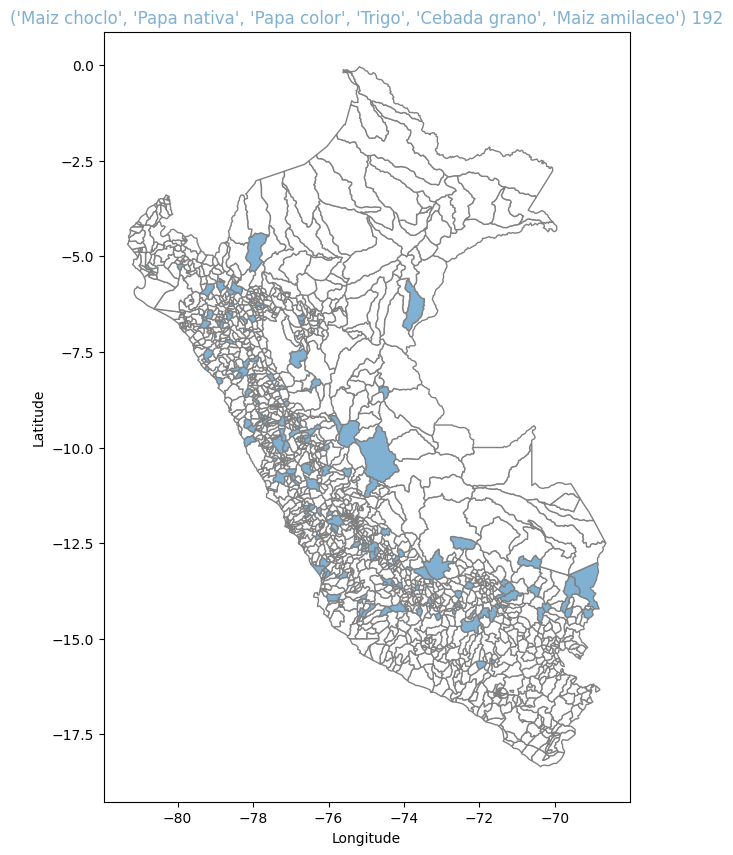

In [ ]:
from tables import index
from matplotlib.colors import ListedColormap

def draw_map(df_, row):
  cmap = ListedColormap(index_distritos(df_, row), name='color_distritos')
  ax = data_geojson.plot(figsize=(10,10), edgecolor='gray', cmap=cmap)
  plt.ylabel('Latitude')
  plt.xlabel('Longitude')
  title = str(df_['Itemset'][df_.index[row]]) + ' ' + str(df_['Freq'][df_.index[row]])
  plt.title(title, size=12, color=my_palette(row))
  plt.show()

row = 1000
draw_map(df, row)

<Figure size 1000x1000 with 0 Axes>

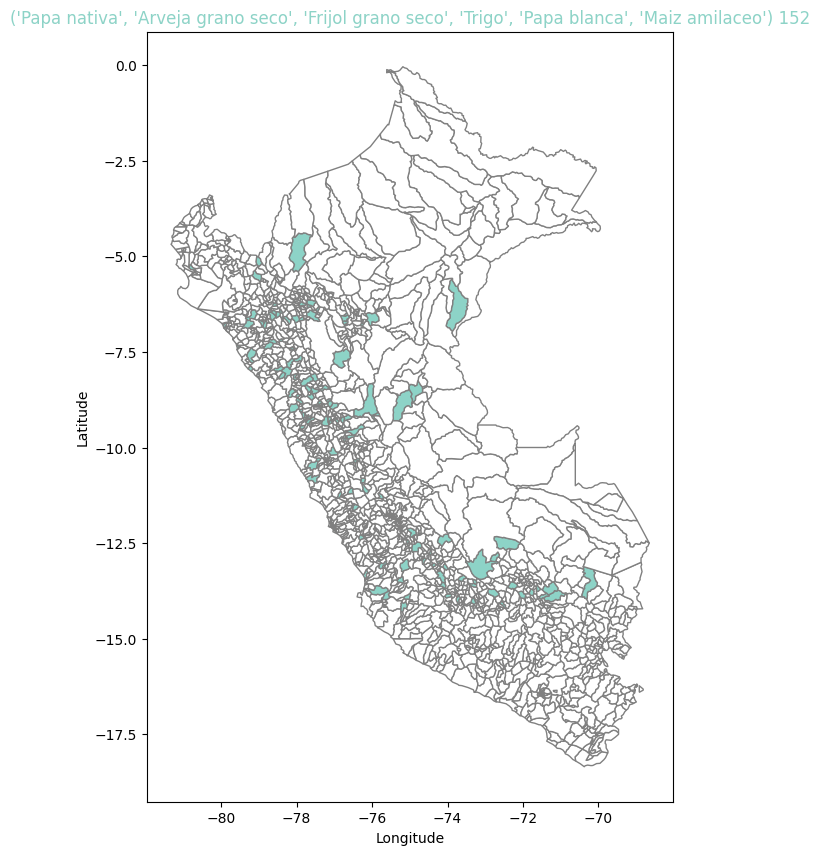

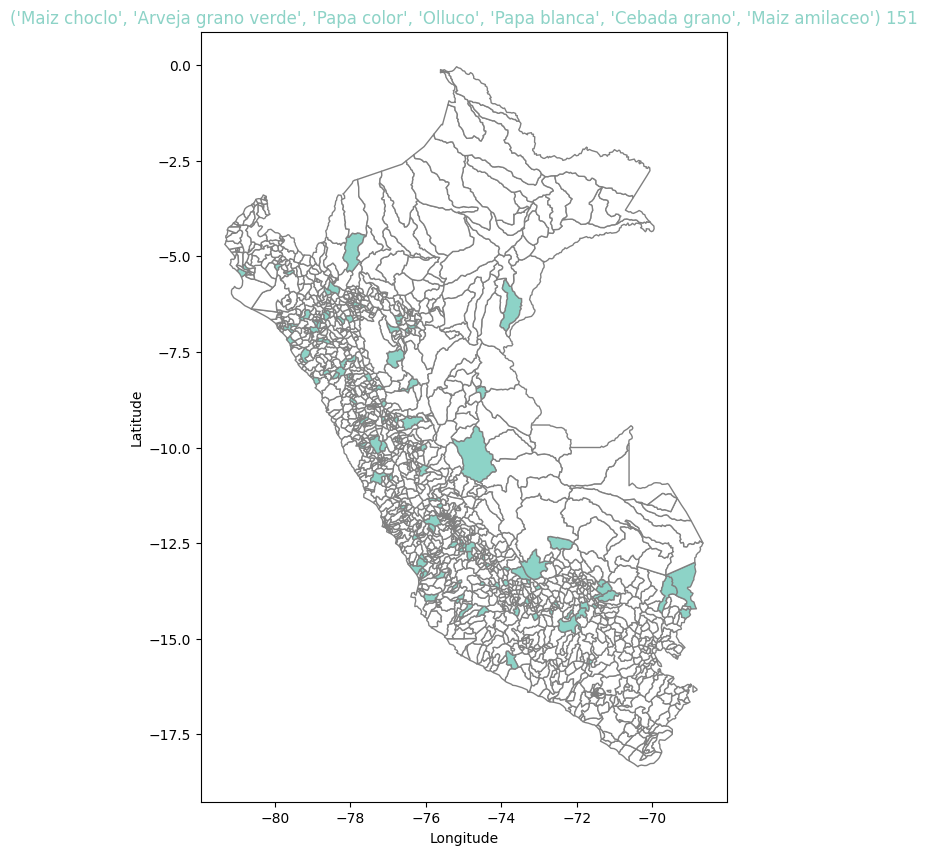

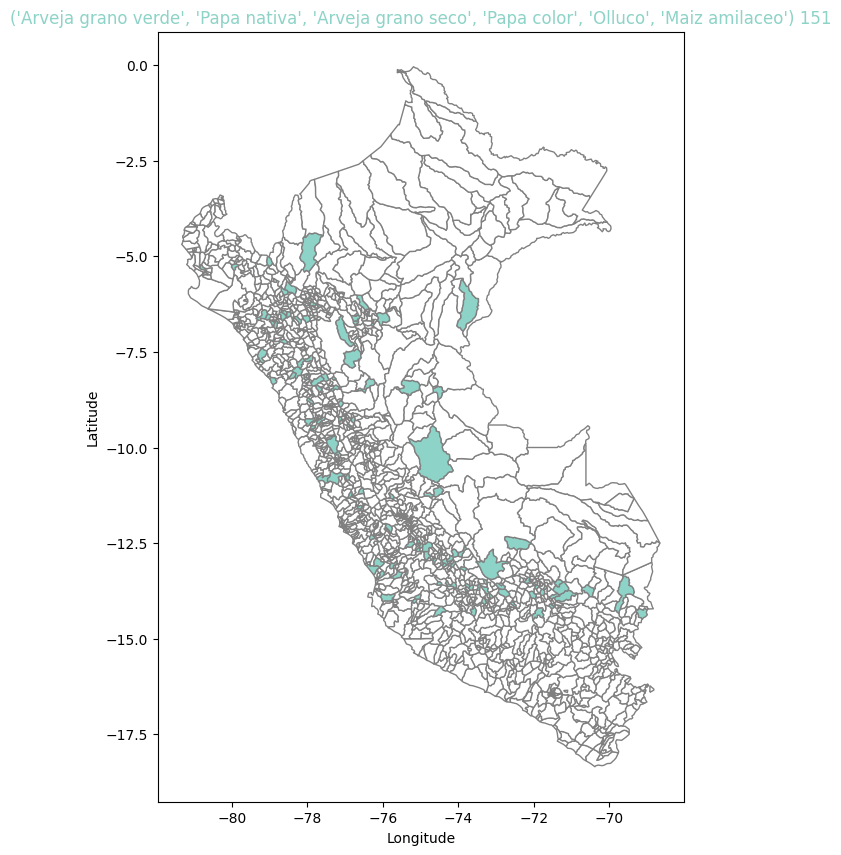

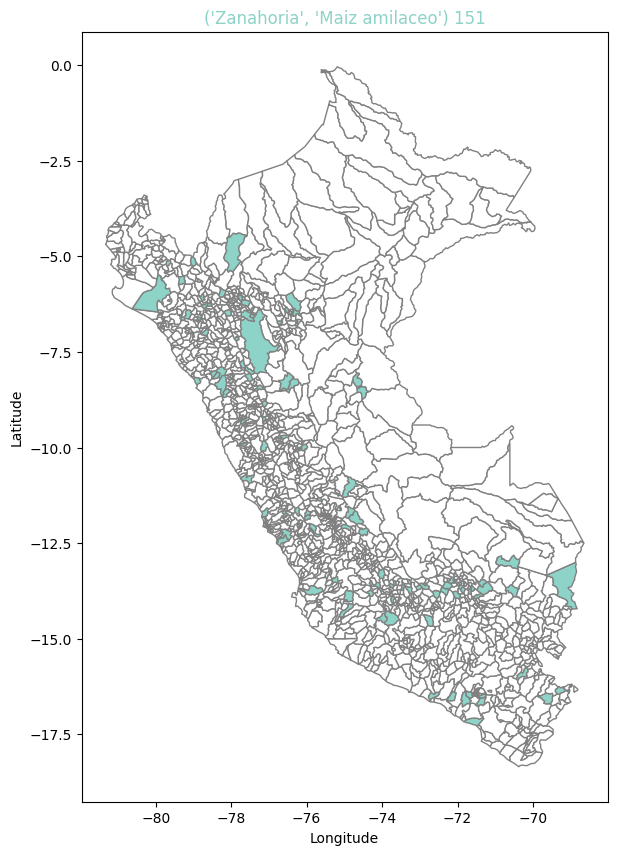

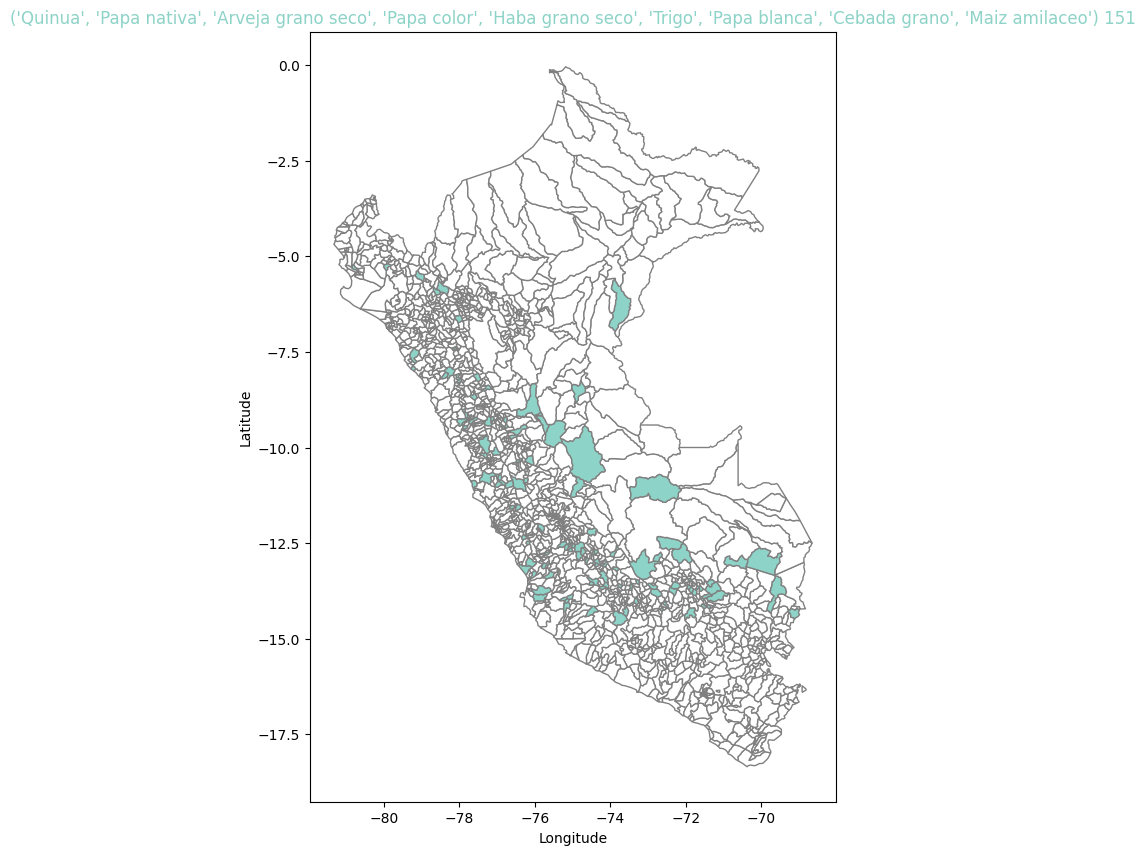

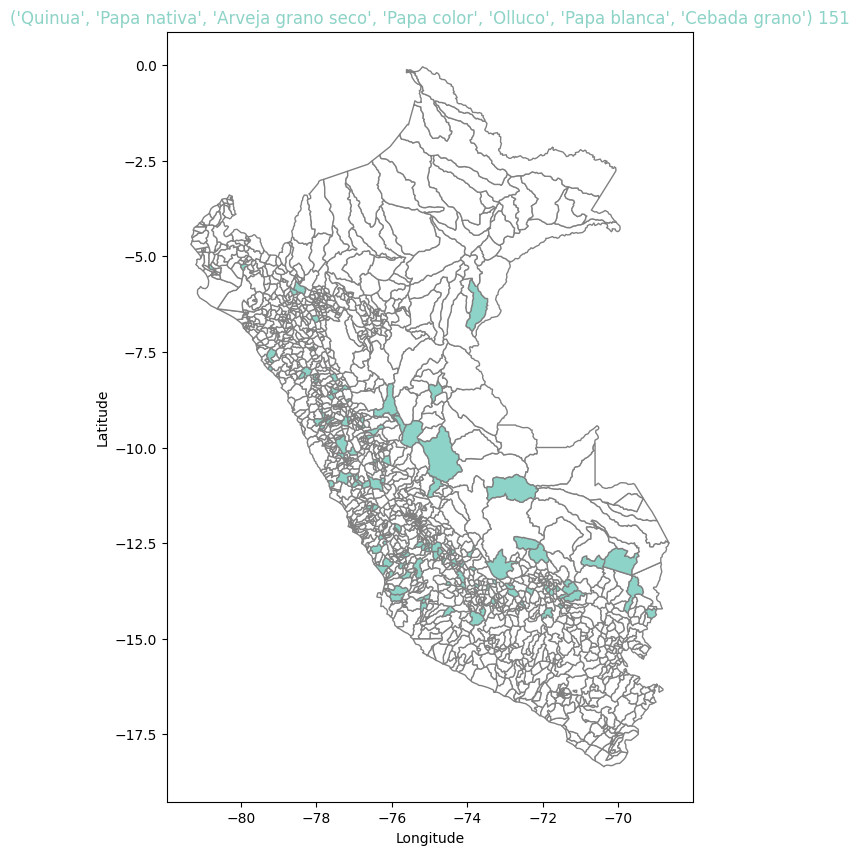

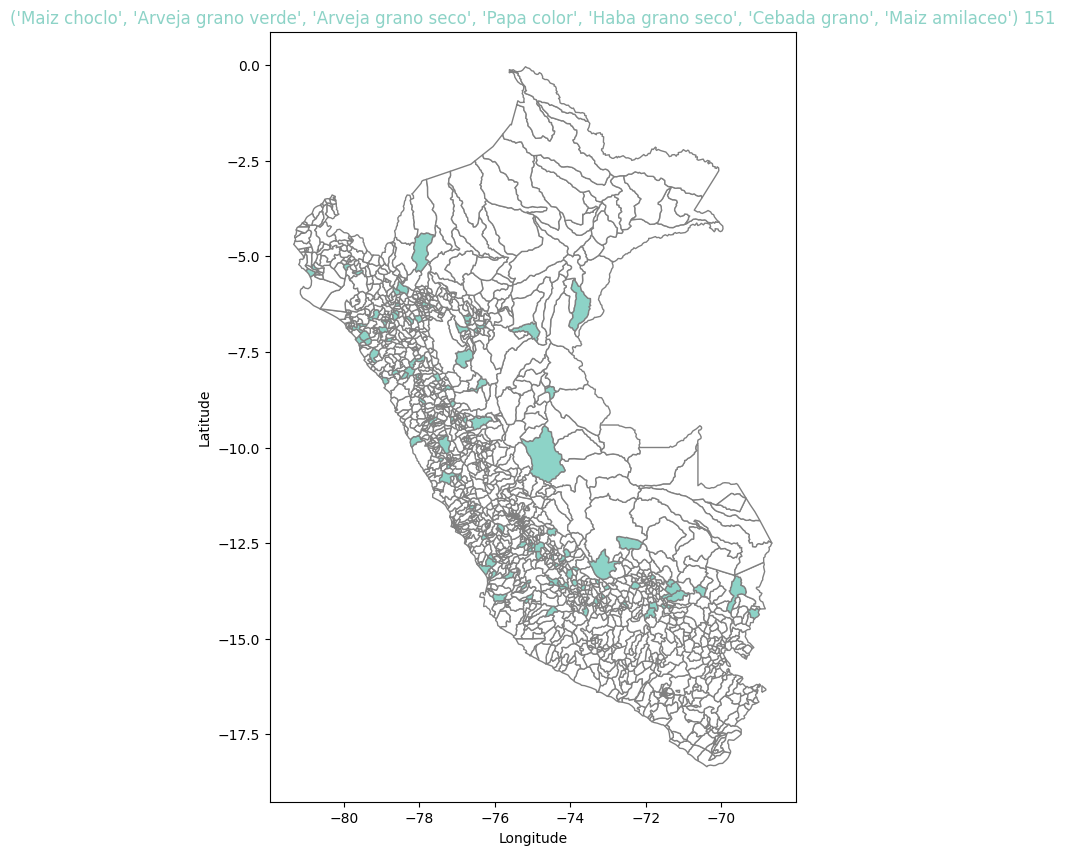

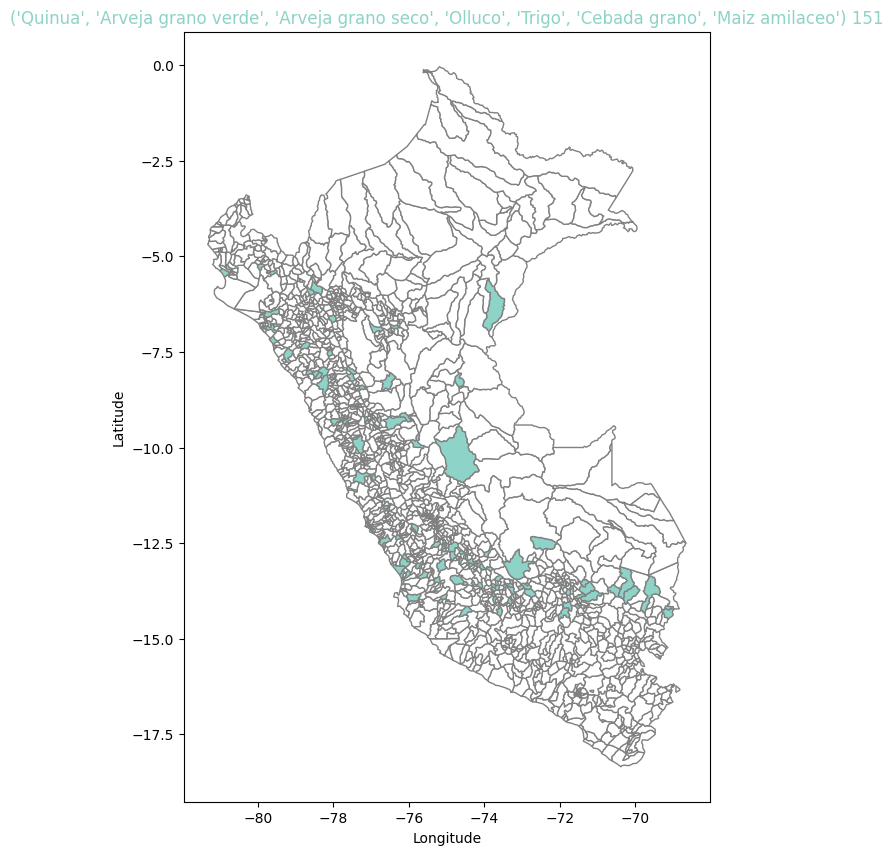

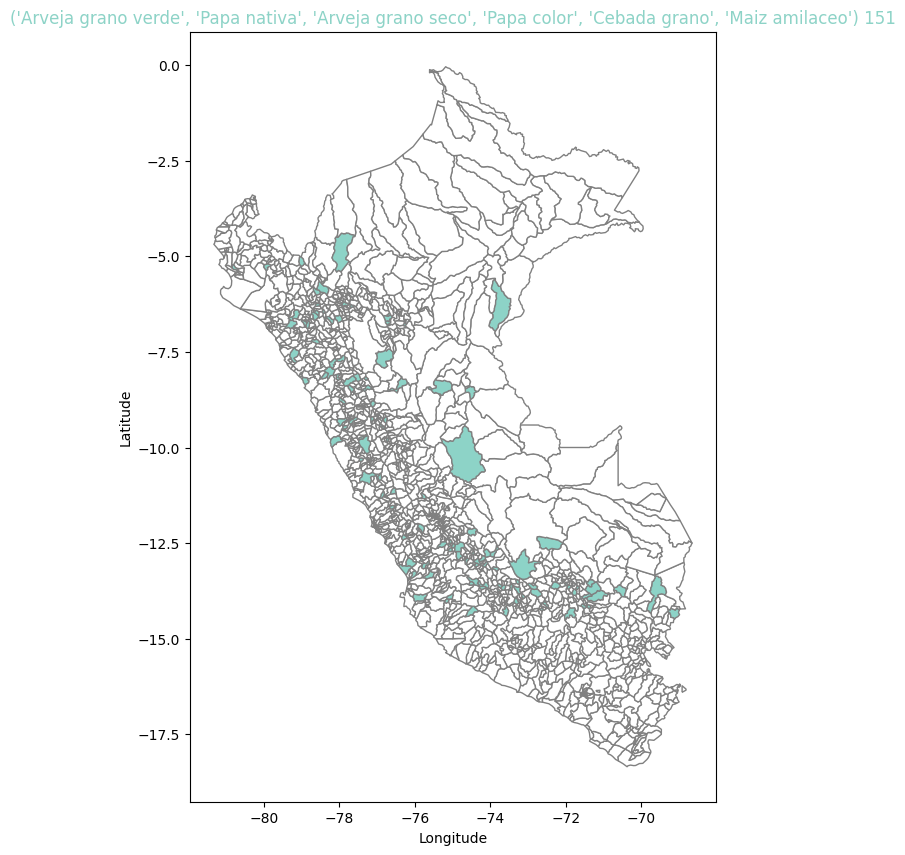

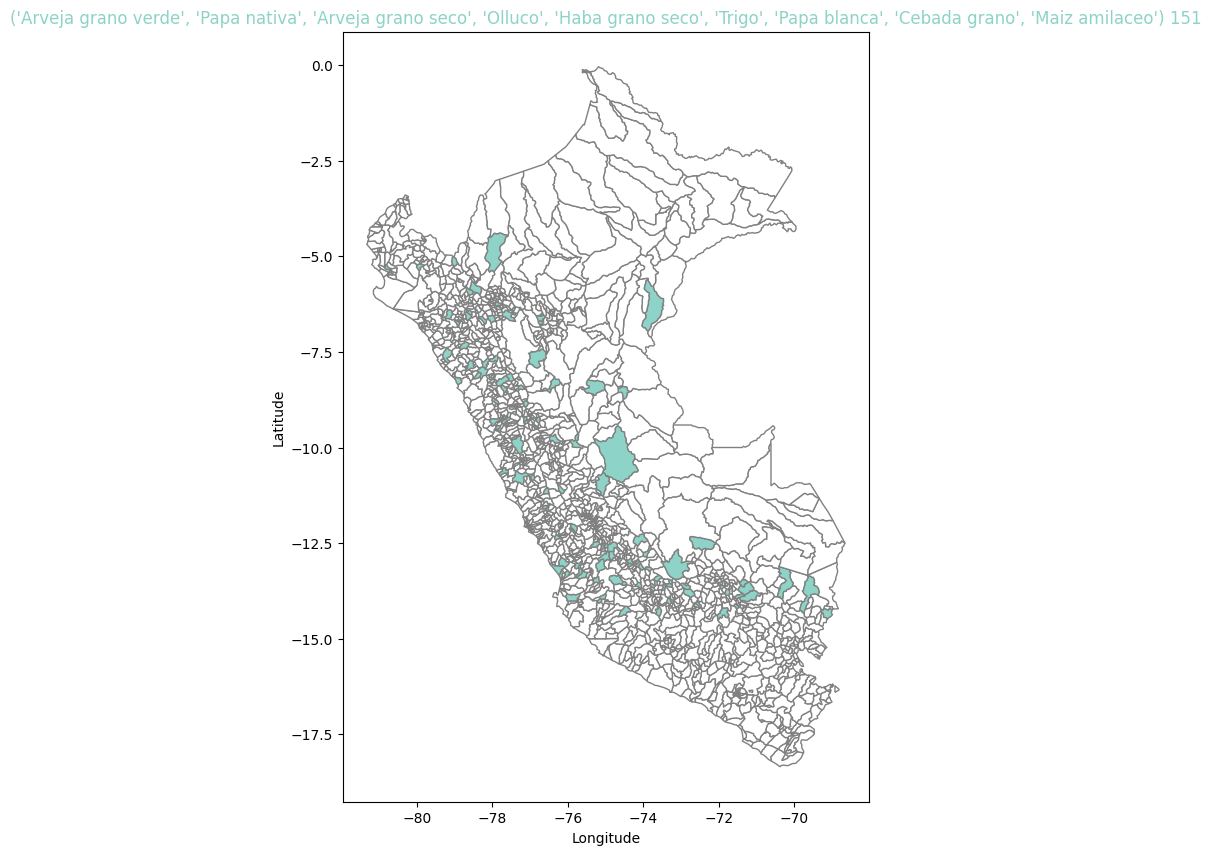

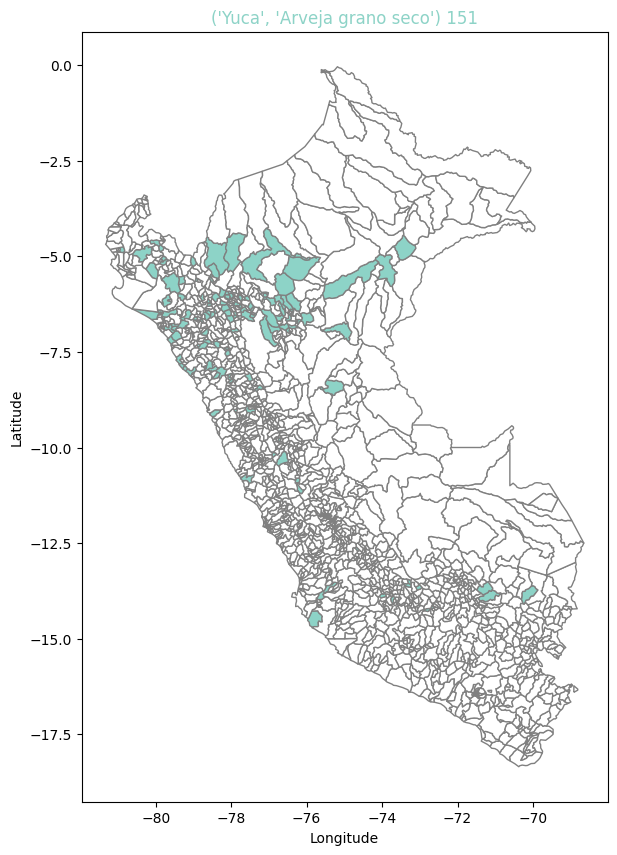

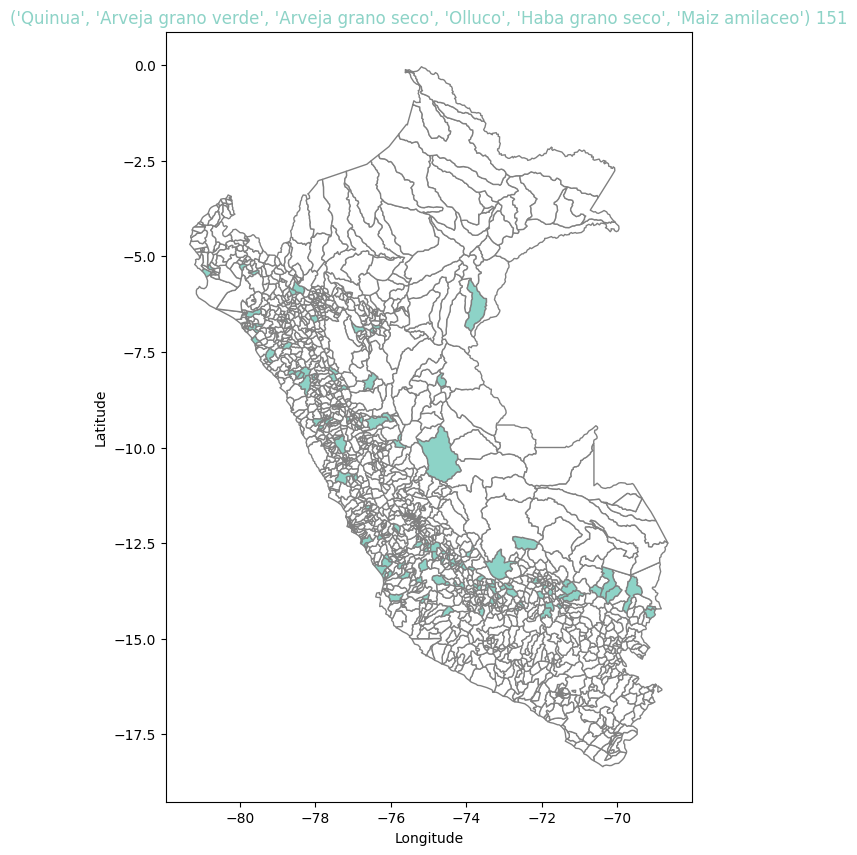

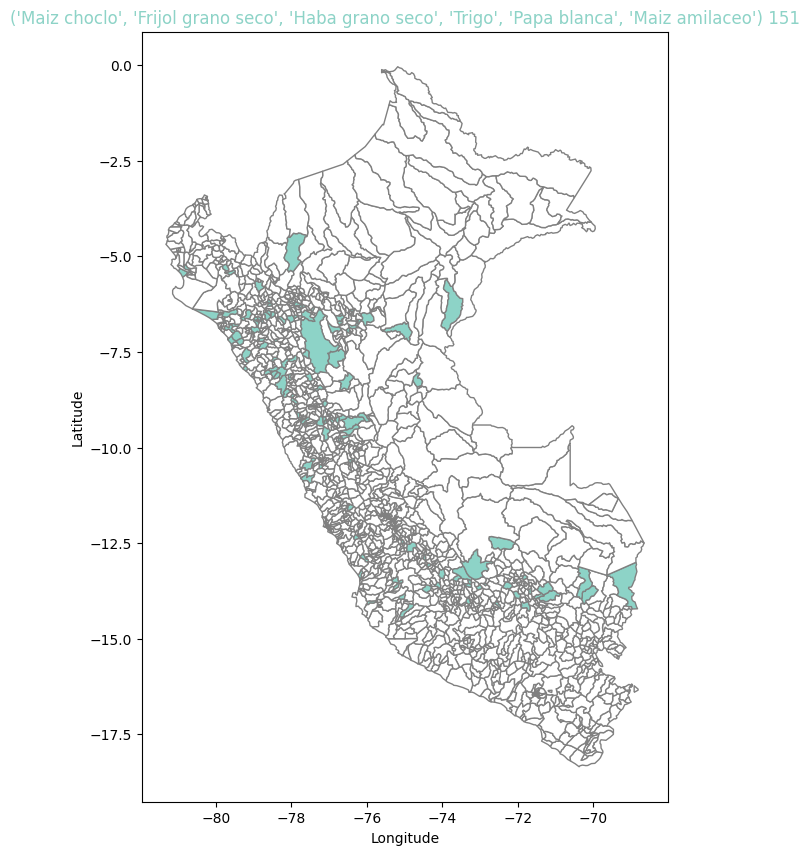

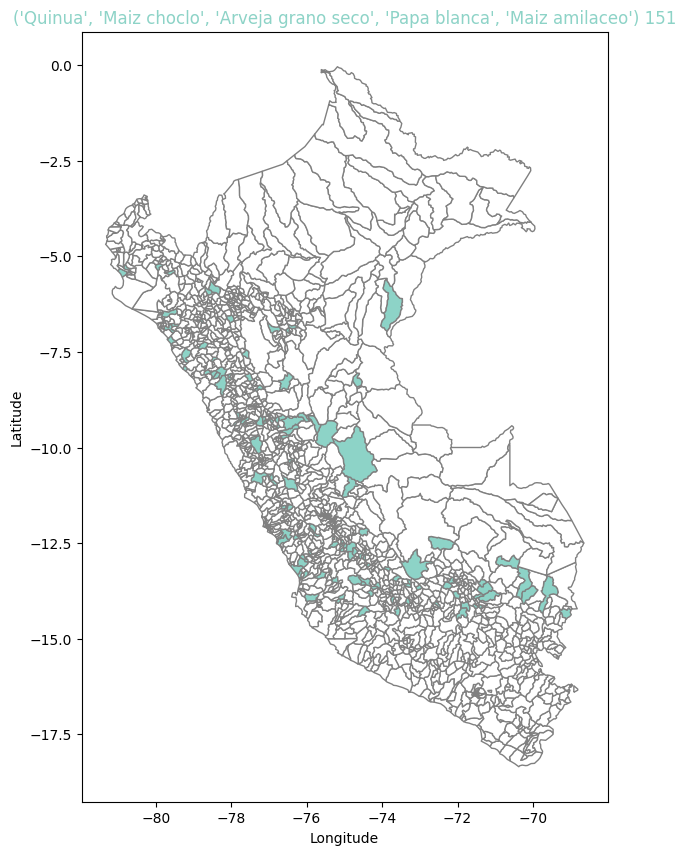

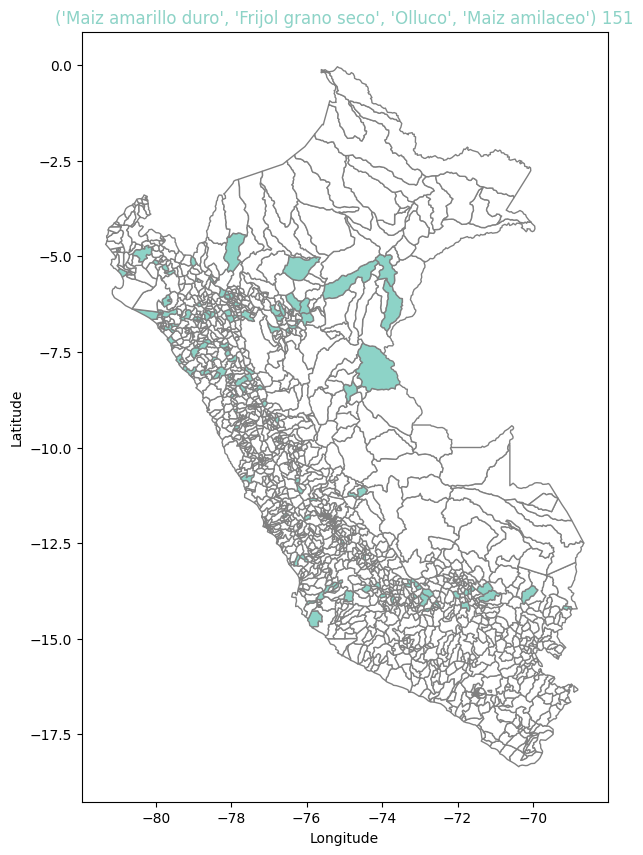

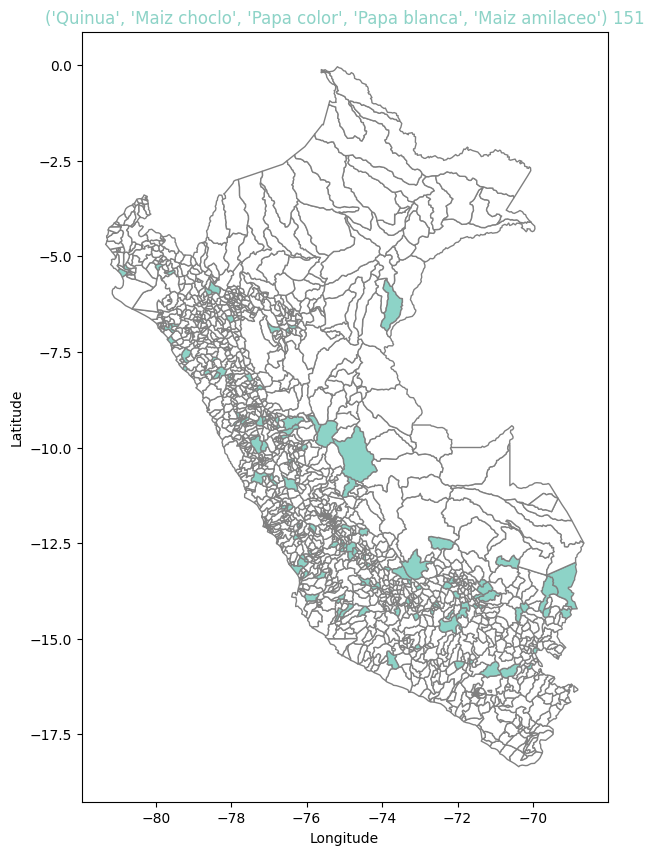

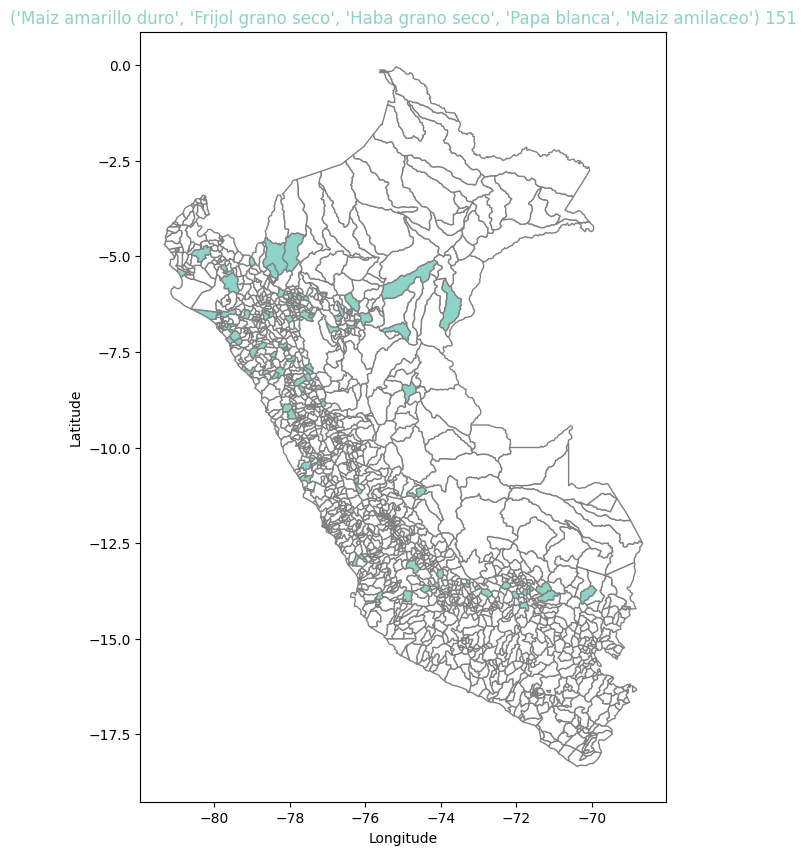

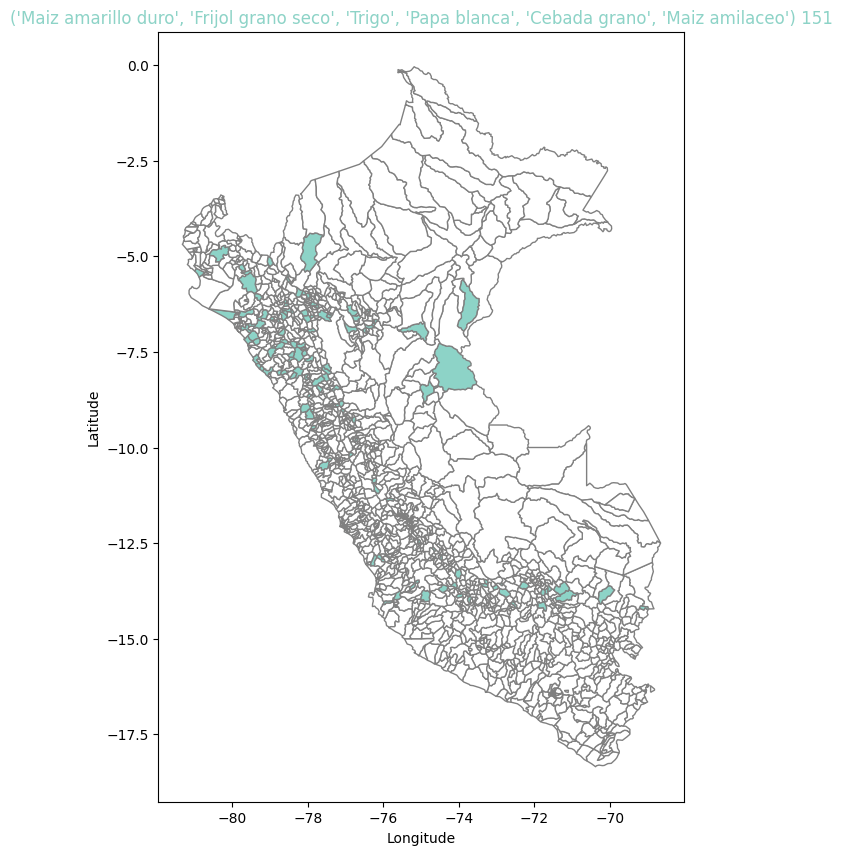

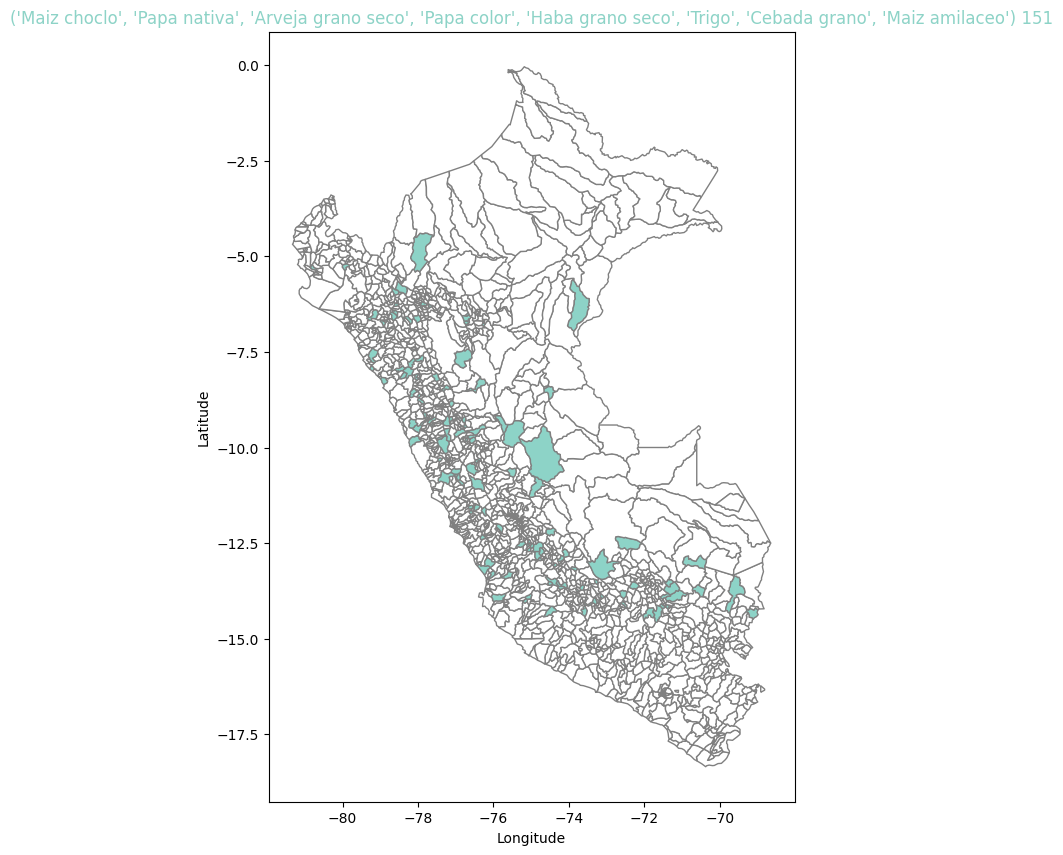

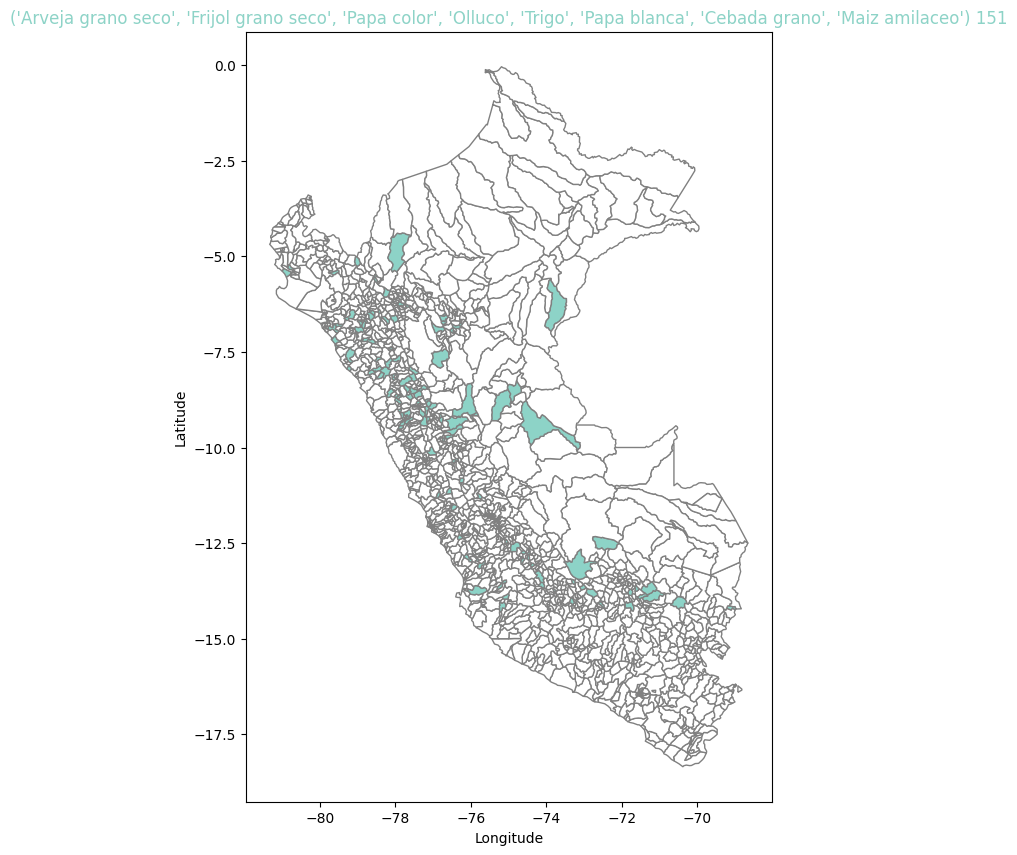

<Figure size 640x480 with 0 Axes>

In [ ]:
def draw_map_all(df_):
  my_dpi = 80
  plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
  for i in range(len(df_.index)):
    draw_map(df_, i)
  plt.tight_layout()
  plt.show()

draw_map_all(df.sort_values(by='Freq', ascending=False).tail(20))